In [ ]:
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [ ]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2774, 0.2321, 0.1825, 0.1627, 0.1452],
         [0.2060, 0.1700, 0.2269, 0.2083, 0.1889]]),
 tensor([1.0000, 1.0000]))

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

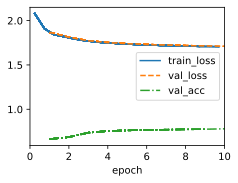

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

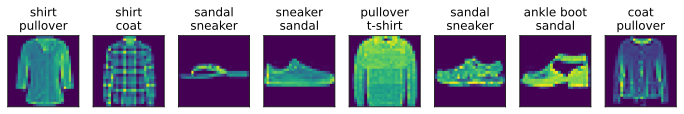

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

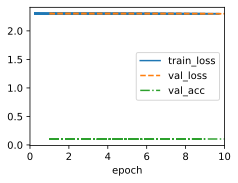

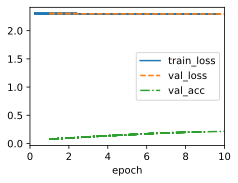

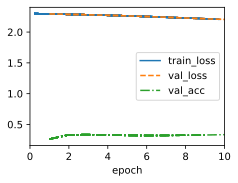

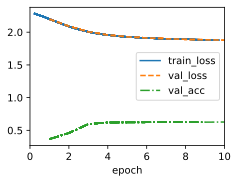

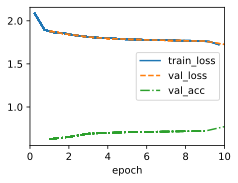

In [ ]:
lr_list = np.logspace(-5, -1, 5)
val_losses = []
val_X, val_y = next(iter(data.val_dataloader()))

# Iterate over each learning rate
for lr in lr_list:
    model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=lr)
    trainer.fit(model, data)

    val_pred = model(val_X)
    loss_fn = torch.nn.CrossEntropyLoss()
    val_loss = loss_fn(val_pred, val_y).item()
    val_losses.append(val_loss)

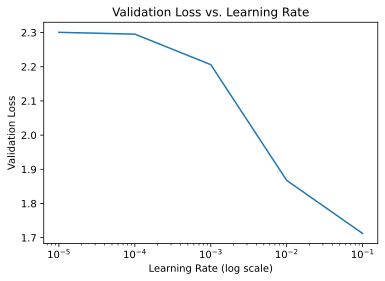

In [ ]:
# Plot validation losses against learning rate
plt.figure(figsize=(6, 4))
plt.semilogx(lr_list, val_losses)
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Learning Rate')
plt.show()

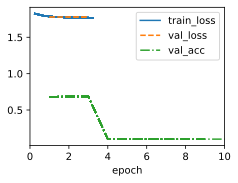

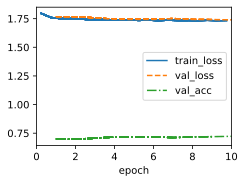

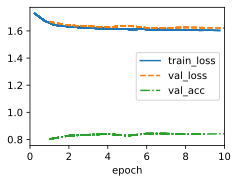

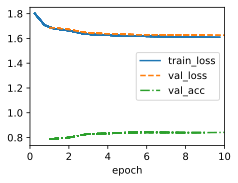

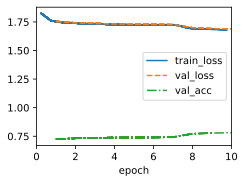

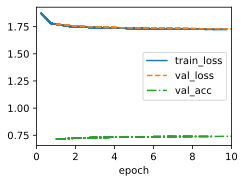

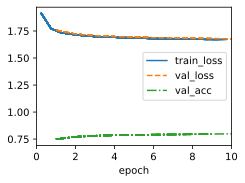

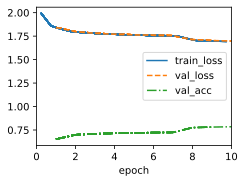

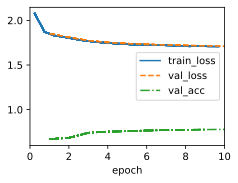

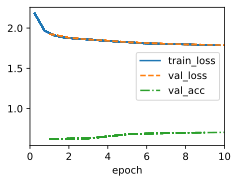

In [ ]:
minibatch_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_losses = []
val_losses = []
train_X, train_y = next(iter(data.train_dataloader()))
val_X, val_y = next(iter(data.val_dataloader()))

# Iterate over each learning rate
for minibatch in minibatch_list:
    data = d2l.FashionMNIST(batch_size=minibatch)
    model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
    trainer.fit(model, data)

    train_pred = model(train_X)
    val_pred = model(val_X)
    loss_fn = torch.nn.CrossEntropyLoss()
    train_loss = loss_fn(train_pred, train_y).item()
    val_loss = loss_fn(val_pred, val_y).item()
    train_losses.append(train_loss)
    val_losses.append(val_loss)

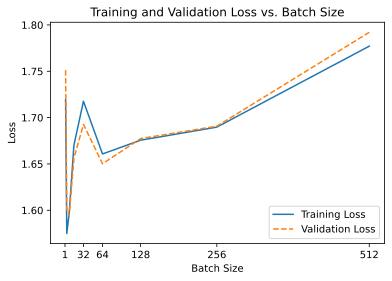

In [ ]:
# Plot training and validation losses against batch size
plt.figure(figsize=(6, 4))
plt.plot(minibatch_list, train_losses, linestyle='-')
plt.plot(minibatch_list, val_losses, linestyle='--')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.xticks([1, 32, 64, 128, 256, 512])
plt.title('Training and Validation Loss vs. Batch Size')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()